In [1]:
import pandas as pd
data = pd.read_csv('TMDB_movie_dataset_v11.csv')


In [11]:

from tabulate import tabulate
data = data.drop(columns=['id', 'adult', 'runtime', 'vote_average', 'popularity','poster_path','backdrop_path','homepage','imdb_id'])

print(data.head())
print(data.columns)

             title  vote_count    status release_date     revenue     budget  \
0        Inception       34495  Released   2010-07-15   825532764  160000000   
1     Interstellar       32571  Released   2014-11-05   701729206  165000000   
2  The Dark Knight       30619  Released   2008-07-16  1004558444  185000000   
3           Avatar       29815  Released   2009-12-15  2923706026  237000000   
4     The Avengers       29166  Released   2012-04-25  1518815515  220000000   

  original_language   original_title  \
0                en        Inception   
1                en     Interstellar   
2                en  The Dark Knight   
3                en           Avatar   
4                en     The Avengers   

                                            overview  \
0  Cobb, a skilled thief who commits corporate es...   
1  The adventures of a group of explorers who mak...   
2  Batman raises the stakes in his war on crime. ...   
3  In the 22nd century, a paraplegic Marine is di...  

In [4]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
def preprocess_data(df):
    # Drop duplicate rows if any
    df.drop_duplicates(inplace=True)
    
    # Fill missing values
    df['title'].fillna('Unknown', inplace=True)
    df['release_date'].fillna('1900-01-01', inplace=True)  # Default date for missing values
    df['overview'].fillna('No overview available', inplace=True)
    df['tagline'].fillna('No tagline', inplace=True)
    df['genres'].fillna('[]', inplace=True)
    df['production_companies'].fillna('[]', inplace=True)
    df['production_countries'].fillna('[]', inplace=True)
    df['spoken_languages'].fillna('[]', inplace=True)
    df['keywords'].fillna('[]', inplace=True)
    df['homepage'].fillna('No homepage', inplace=True)
    df['imdb_id'].fillna('No ID', inplace=True)
    df['backdrop_path'].fillna('No image', inplace=True)
    df['poster_path'].fillna('No image', inplace=True)
    
    # Convert release_date to datetime format
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    
    # Convert categorical columns to category type
    categorical_cols = ['status', 'original_language', 'adult']
    for col in categorical_cols:
        df[col] = df[col].astype('category')
    
    # Drop columns with excessive missing values
    threshold = 0.3  # Drop columns with more than 70% missing values
    df = df.dropna(thresh=int(threshold * len(df)), axis=1)
    
    return df

# Example usage
df = pd.read_csv('TMDB_movie_dataset_v11.csv')


# Preprocess the data
df = preprocess_data(df)

# Check the processed data
print(df.info())

# Save the preprocessed data to a new CSV file
df.to_csv('TMDB_movie_dataset_preprocessed.csv', index=False)

print("Preprocessed data saved as 'TMDB_movie_dataset_preprocessed.csv'")

<class 'pandas.core.frame.DataFrame'>
Index: 1183400 entries, 0 to 1183769
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1183400 non-null  int64         
 1   title                 1183400 non-null  object        
 2   vote_average          1183400 non-null  float64       
 3   vote_count            1183400 non-null  int64         
 4   status                1183400 non-null  category      
 5   release_date          1183400 non-null  datetime64[ns]
 6   revenue               1183400 non-null  int64         
 7   runtime               1183400 non-null  int64         
 8   adult                 1183400 non-null  category      
 9   backdrop_path         1183400 non-null  object        
 10  budget                1183400 non-null  int64         
 11  homepage              1183400 non-null  object        
 12  imdb_id               1183400 non-null  object 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1183400 entries, 0 to 1183769
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1183400 non-null  int64         
 1   title                 1183400 non-null  object        
 2   vote_average          1183400 non-null  float64       
 3   vote_count            1183400 non-null  int64         
 4   status                1183400 non-null  category      
 5   release_date          1183400 non-null  datetime64[ns]
 6   revenue               1183400 non-null  int64         
 7   runtime               1183400 non-null  int64         
 8   adult                 1183400 non-null  category      
 9   backdrop_path         1183400 non-null  object        
 10  budget                1183400 non-null  int64         
 11  homepage              1183400 non-null  object        
 12  imdb_id               1183400 non-null  object 

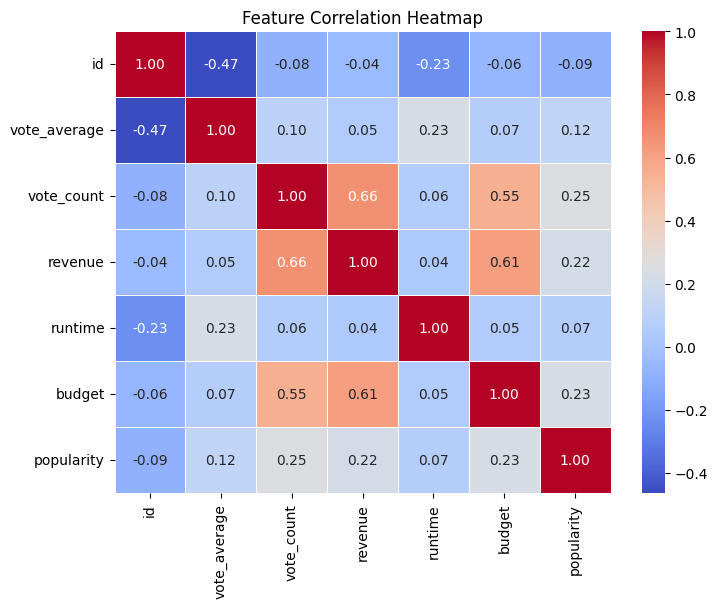

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [8]:
df = df.drop(columns=['id', 'adult', 'runtime', 'vote_average', 'popularity','poster_path','backdrop_path','homepage','imdb_id'])


In [9]:
df.columns
df.head()

,title,vote_count,status,release_date,revenue,budget,original_language,original_title,overview,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,Inception,34495,Released,2010-07-15,825532764,160000000,en,Inception,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,Interstellar,32571,Released,2014-11-05,701729206,165000000,en,Interstellar,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,The Dark Knight,30619,Released,2008-07-16,1004558444,185000000,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,Avatar,29815,Released,2009-12-15,2923706026,237000000,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,The Avengers,29166,Released,2012-04-25,1518815515,220000000,en,The Avengers,When an unexpected enemy emerges and threatens...,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Index(['genres', 'budget', 'revenue'], dtype='object')

🎬 Movie Box Office Revenue Prediction Model 📊
------------------------------------------------
Model Performance:
- Mean Absolute Error (MAE): 2.77
- Root Mean Squared Error (RMSE): 3.63
- R-Squared (R2): 0.51


🔥 Key Influencing Factors:
       Feature  Coefficient
genre_encoded     0.814276
   log_budget     0.232870


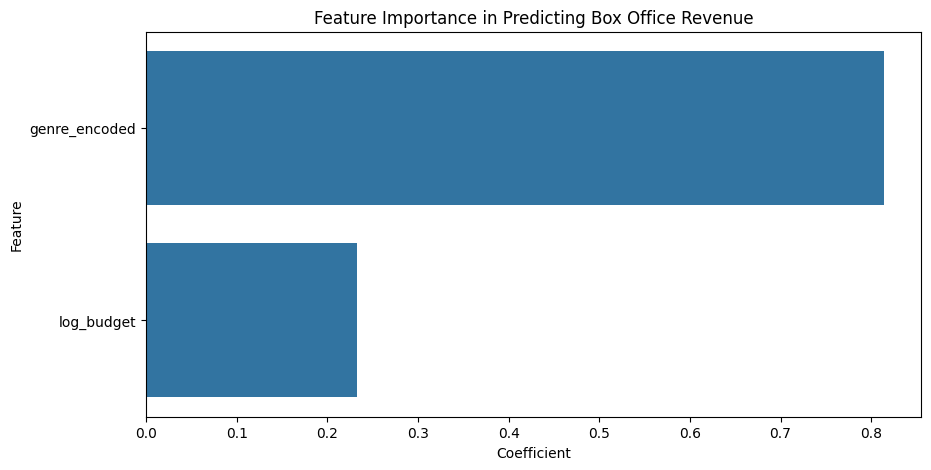

Enter movie genre:  action,thiller
Enter movie budget ($):  2000000


🎥 Estimated Box Office Revenue: $3,528,961.41


In [10]:
!pip install joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to preprocess data
def preprocess_data(df):
    """Prepares the dataset by handling missing values, transforming features, and encoding genres."""
    
    df = df[['genres', 'budget', 'revenue']].dropna().copy()
    df = df[df['revenue'] > 0]  # Ensure valid revenue values
    print(df.columns)
    # Log transform budget and revenue
    df['log_budget'] = np.log1p(df['budget'])
    df['log_revenue'] = np.log1p(df['revenue'])

    # Target mean encoding for genres
    genre_means = df.groupby('genres')['log_revenue'].mean().to_dict()
    df['genre_encoded'] = df['genres'].map(genre_means)

    return df.drop(columns=['genres', 'budget', 'revenue']), genre_means

# Function to train and evaluate the model
def train_model(df):
    """Trains a Linear Regression model and evaluates its performance."""
    
    df, genre_means = preprocess_data(df)
    X, y = df.drop(columns=['log_revenue']), df['log_revenue']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Save model and genre encodings
    joblib.dump(model, 'box_office_model.pkl')
    joblib.dump(genre_means, 'genre_means.pkl')

    # Evaluate model
    y_pred = model.predict(X_test)
    metrics = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred),
    }

    # Feature importance
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
    feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)

    # Performance Report
    print(f"\n🎬 Movie Box Office Revenue Prediction Model 📊\n"
          f"------------------------------------------------\n"
          f"Model Performance:\n"
          f"- Mean Absolute Error (MAE): {metrics['MAE']:.2f}\n"
          f"- Root Mean Squared Error (RMSE): {metrics['RMSE']:.2f}\n"
          f"- R-Squared (R2): {metrics['R2']:.2f}\n")

    print("\n🔥 Key Influencing Factors:\n", feature_importance.to_string(index=False))

    # Plot feature importance
    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_importance['Coefficient'], y=feature_importance['Feature'])
    plt.title('Feature Importance in Predicting Box Office Revenue')
    plt.show()

    return model

# Function to predict revenue for a new movie
def predict_revenue(genre, budget):
    """Predicts the box office revenue of a new movie given its genre and budget."""
    
    model = joblib.load('box_office_model.pkl')
    genre_means = joblib.load('genre_means.pkl')

    genre_encoded = genre_means.get(genre, np.mean(list(genre_means.values())))  # Default to mean if unknown
    log_budget = np.log1p(budget)

    input_data = pd.DataFrame({'log_budget': [log_budget], 'genre_encoded': [genre_encoded]})
    revenue_pred = np.expm1(model.predict(input_data)[0])  # Convert log revenue back to actual revenue

    print(f"🎥 Estimated Box Office Revenue: ${revenue_pred:,.2f}")
    return revenue_pred

# Main execution
if __name__ == "__main__":
    
    train_model(df)

    # Get user input
    genre = input("Enter movie genre: ")
    budget = float(input("Enter movie budget ($): "))
    predict_revenue(genre, budget)
